In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import *
import matplotlib.animation as animation
from JSAnimation import IPython_display
%matplotlib inline

# Ejercicio 1




In [2]:
def sucesion(cond_ini, epsilon, N=2000, tau=1.):
    cond = zeros((N,2))
    cond[0] = cond_ini
    for i in xrange(1, N):
        cond[i,1] = cond[i-1,1] + epsilon*cos(cond[i-1,0])
        cond[i,0] = (cond[i-1,0] + cond[i,1]*tau)%(2*pi)
        
    return cond[:,0], cond[:,1]

def mapeo(epsilon, ax, n=200, N=2000, tau=1.):
    for i in xrange(n):
        cond_ini = array([2.0*pi*random.rand(), pi*(random.rand()-0.5)])
        x, y = sucesion(cond_ini, epsilon, N, tau)
        ax.plot(x, y, '.', markersize=0.1)
        ax.set_title("$\epsilon = {}$".format(epsilon), fontsize=20)
        ax.set_xlabel("$\\theta$", fontsize=20)
        ax.set_ylabel("$p$", fontsize=20)
        ax.set_xlim(0,2*pi)
        ax.set_ylim(-2,2)

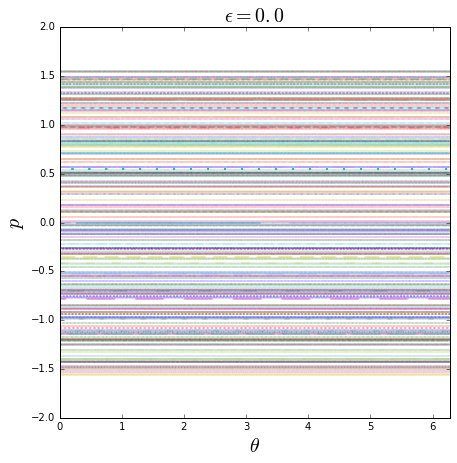

In [3]:
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)
mapeo(0., ax, n=200, N=2000)

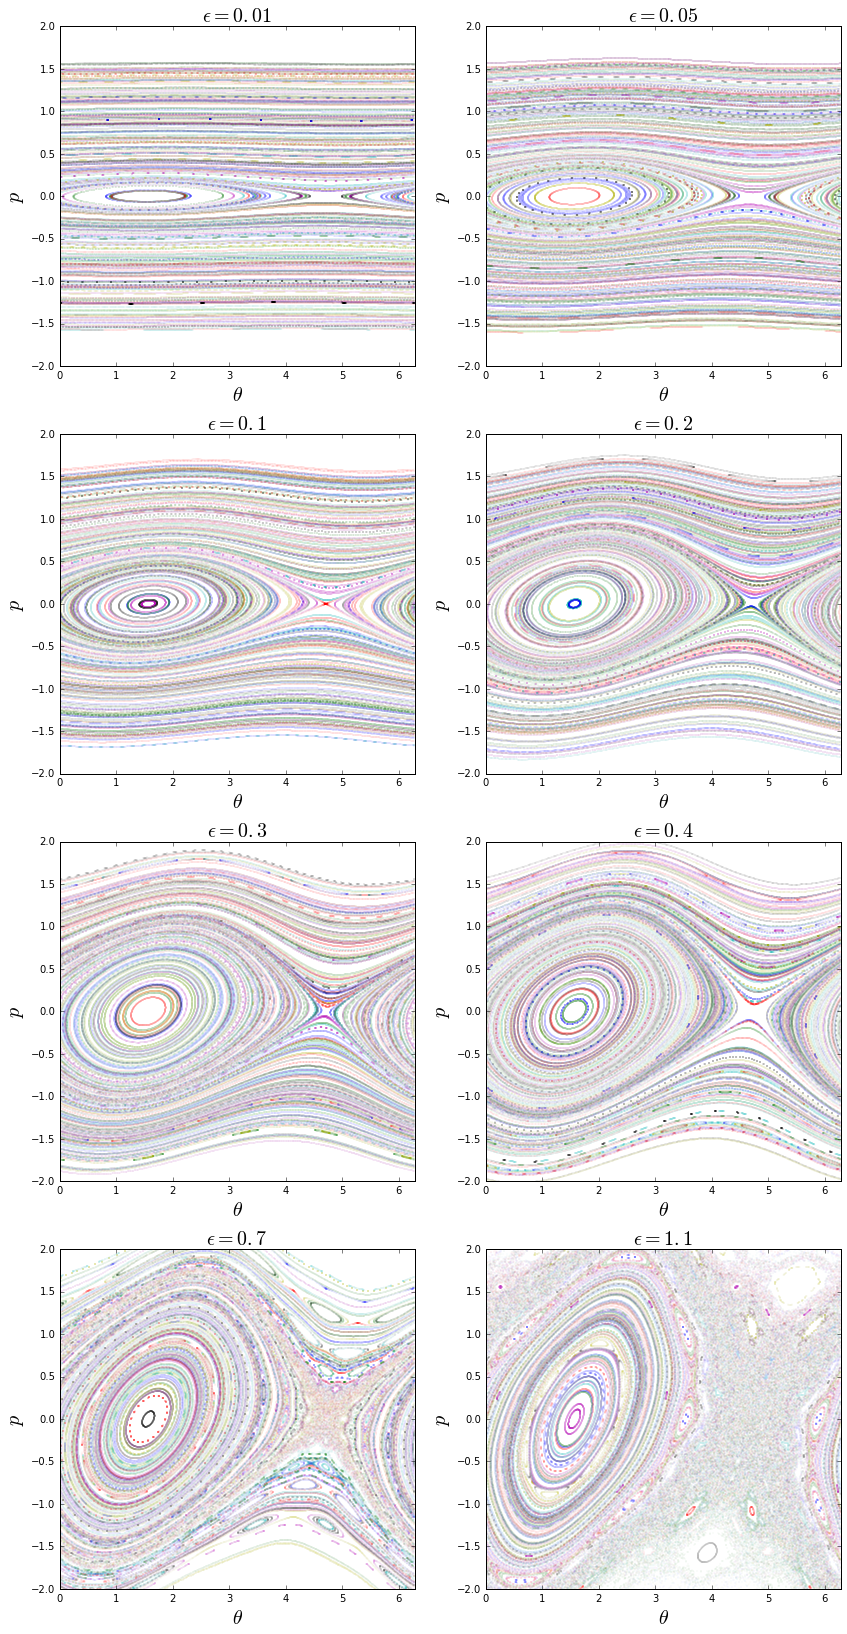

In [4]:
fig, axarr = subplots(4, 2, figsize=(14,28))
eps = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1]
for i in range(4):
    for j in range(2):
        mapeo(eps[i*2+j], axarr[i,j], n=300, N=1000)


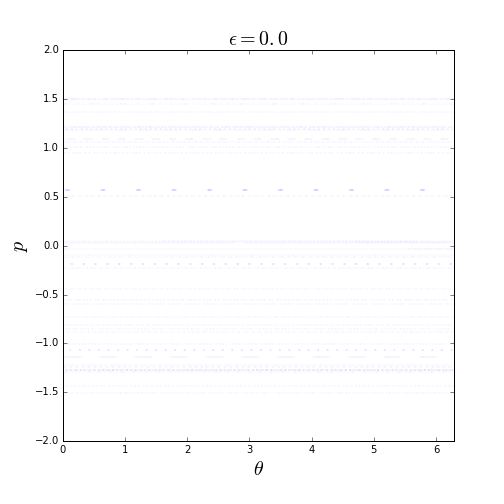
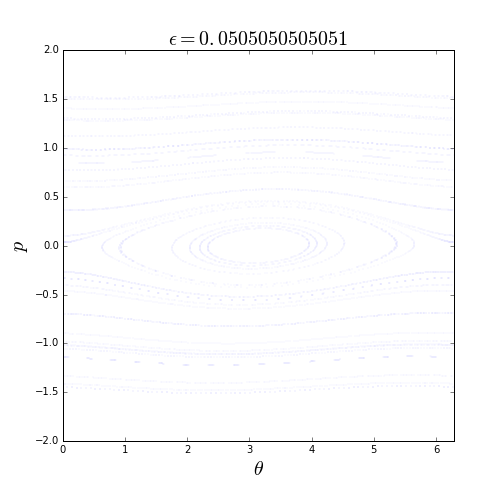
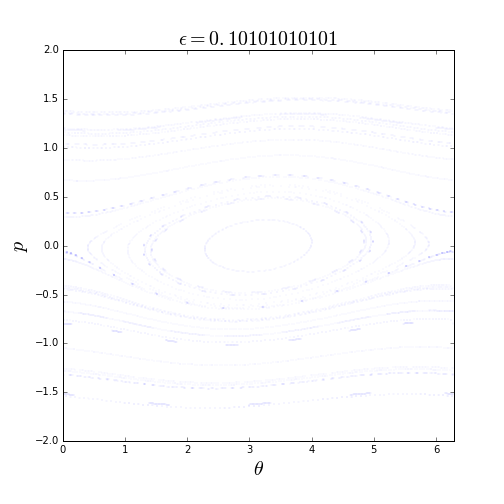
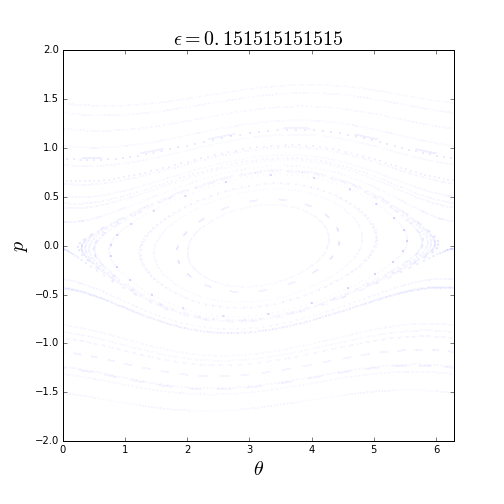
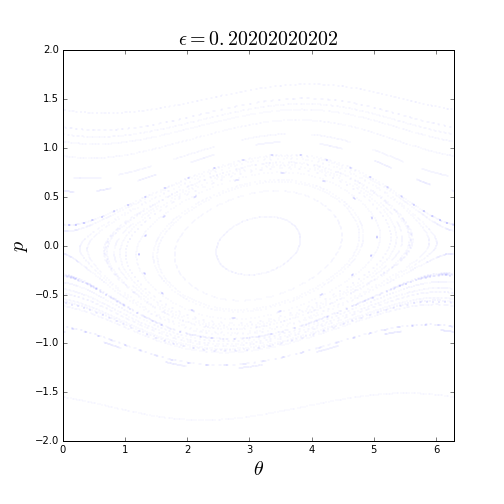
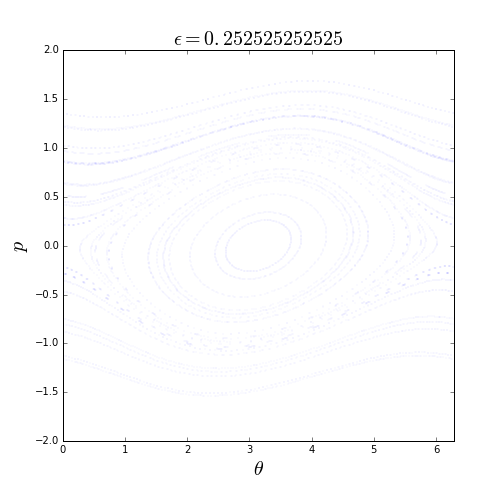
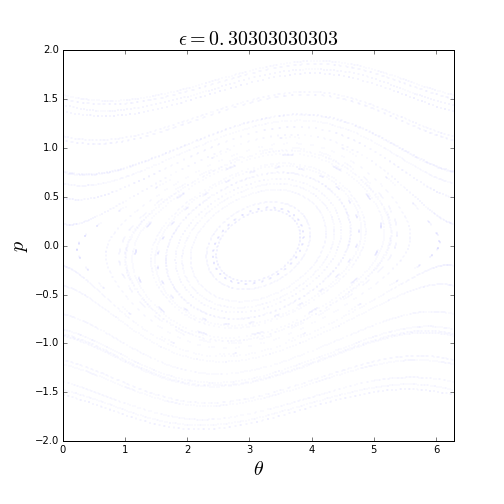
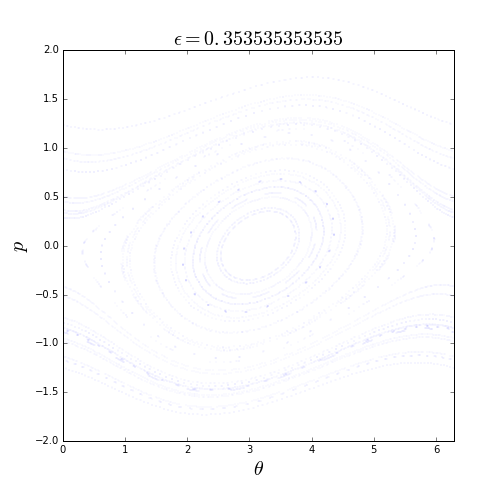
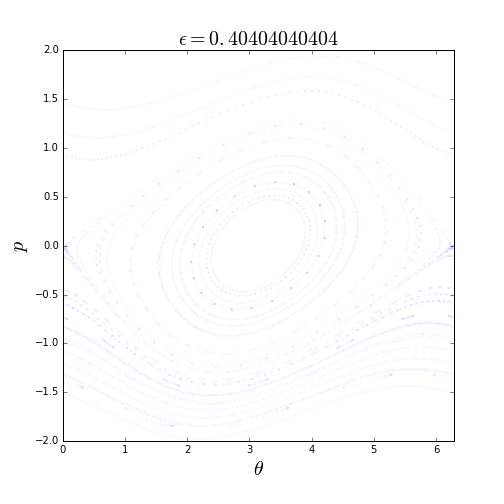
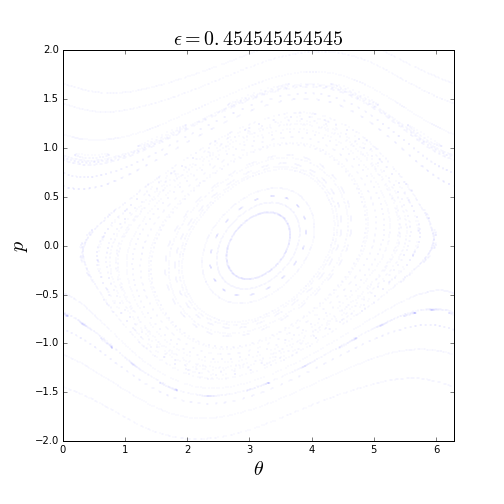
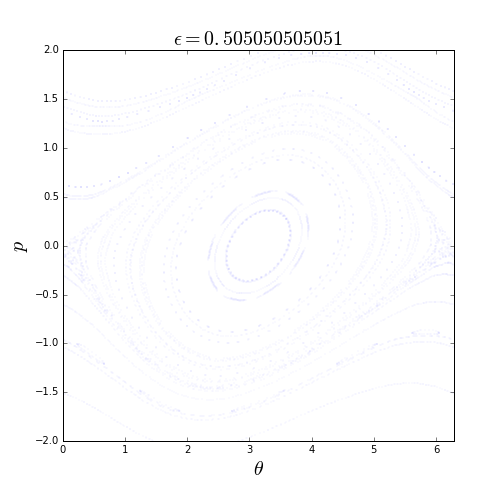
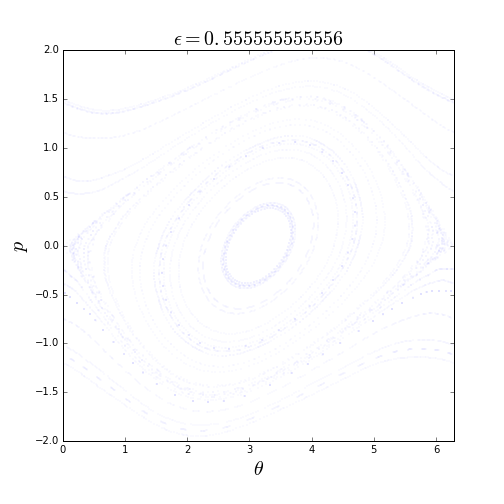
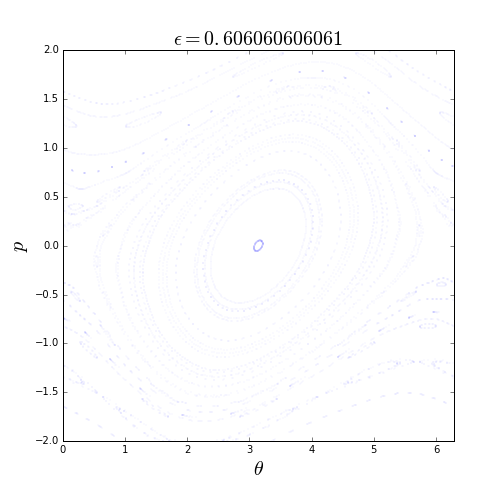
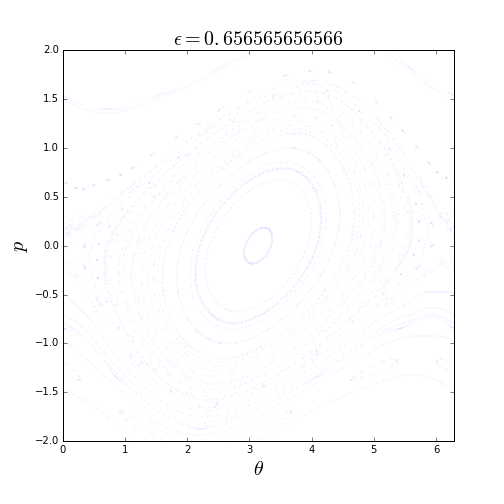
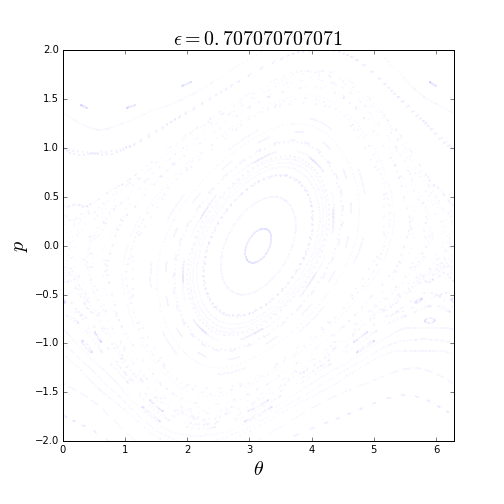
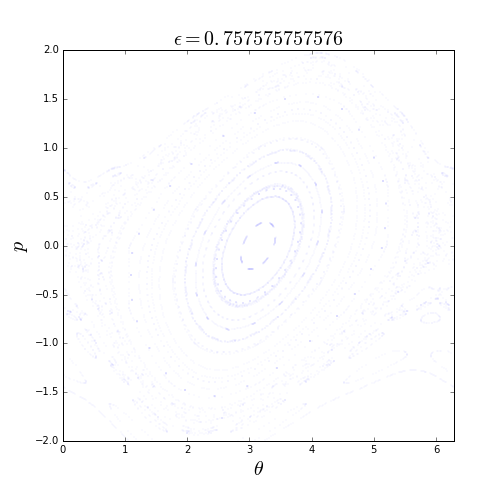
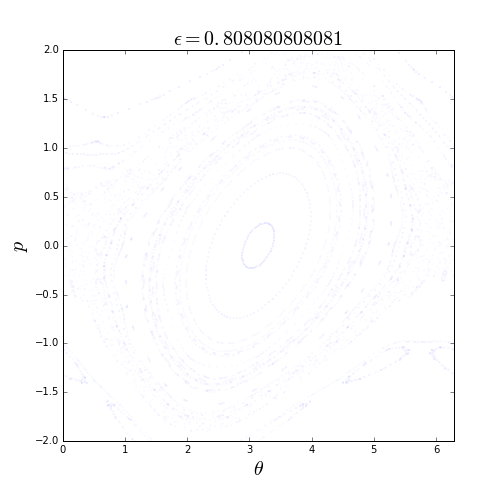
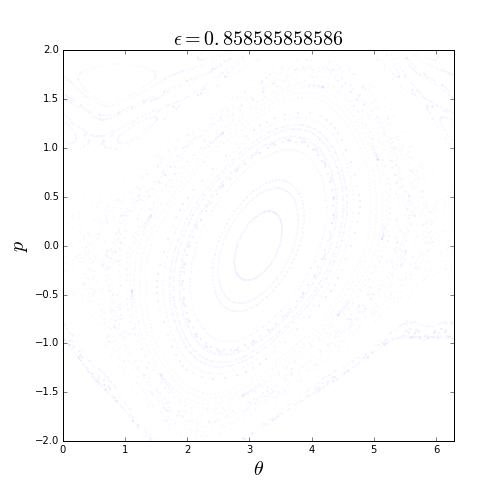
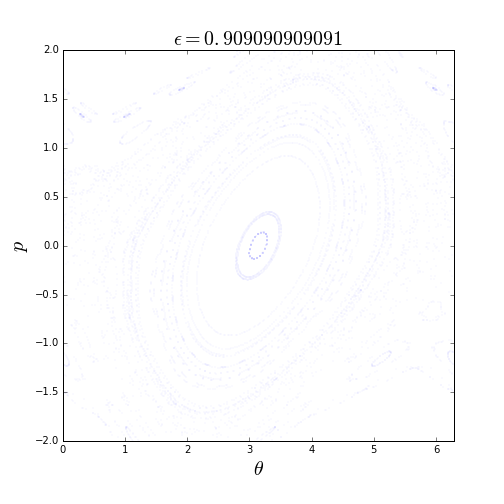
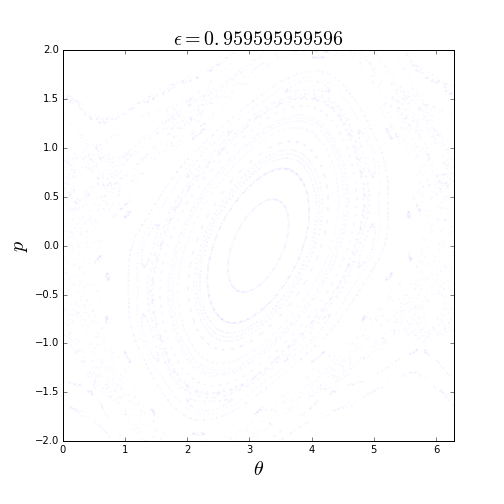
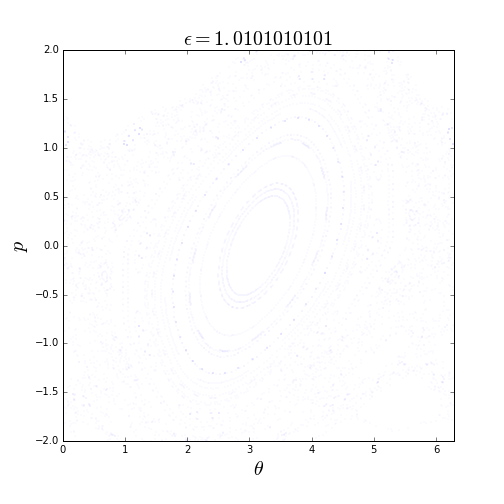
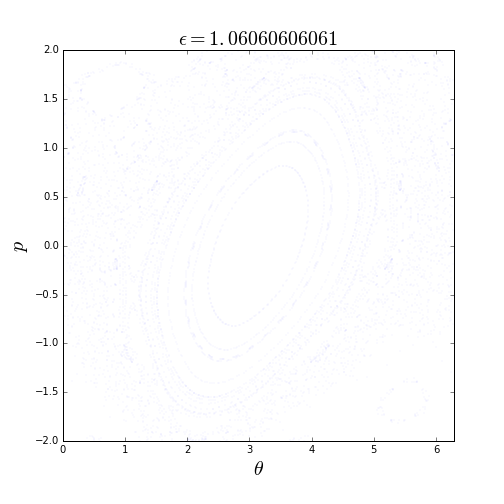
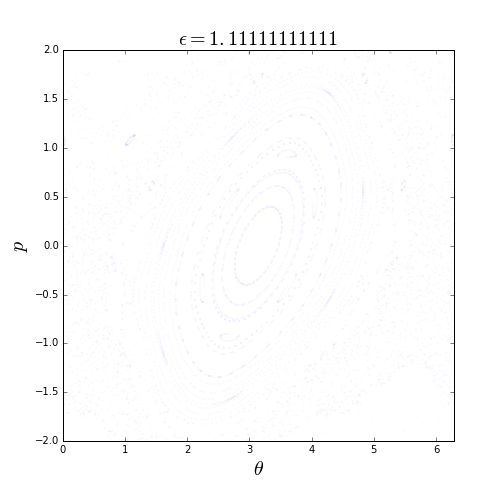
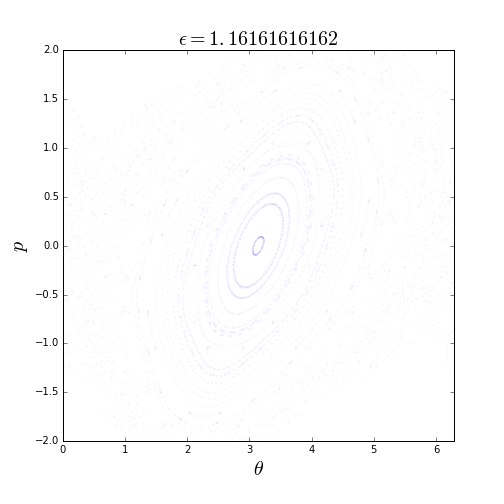
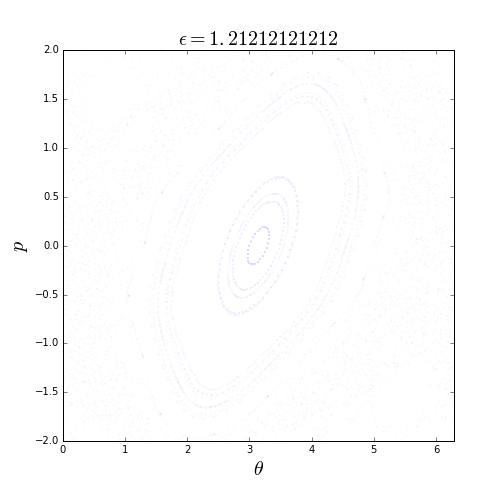
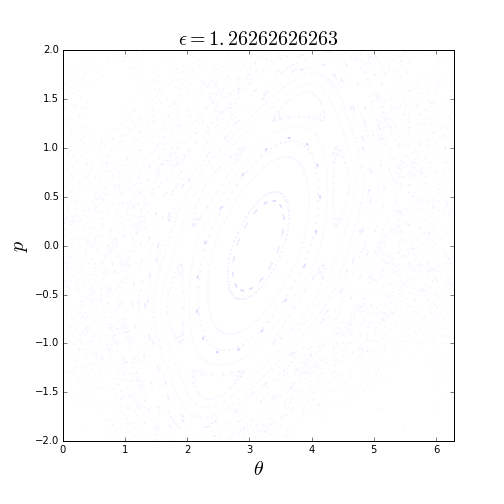
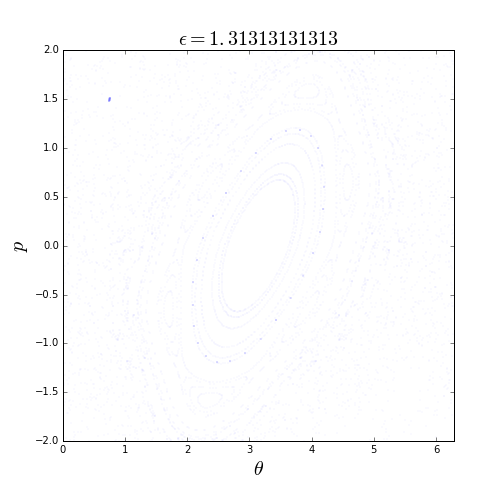
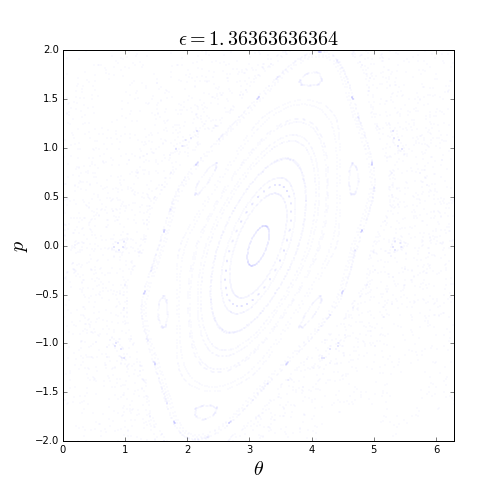
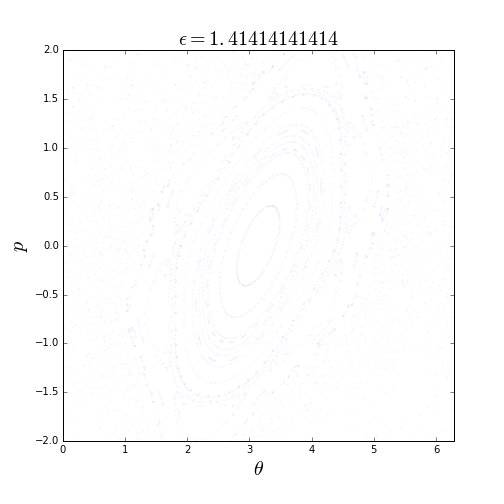
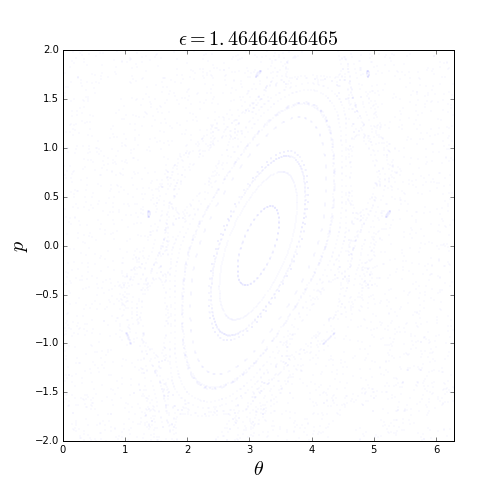
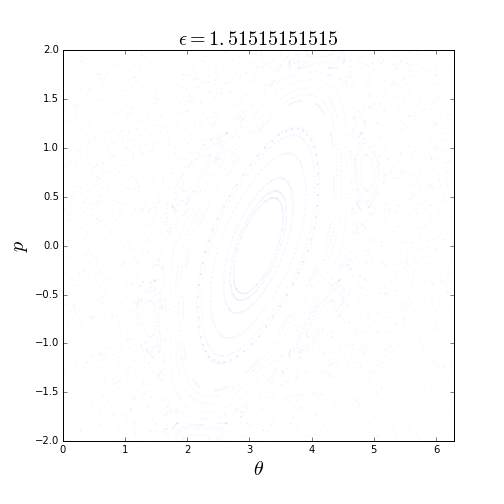
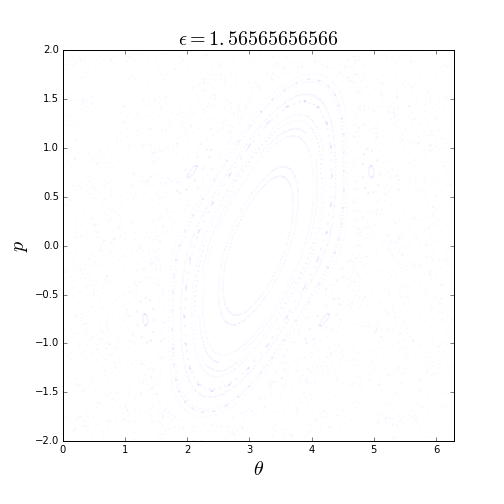
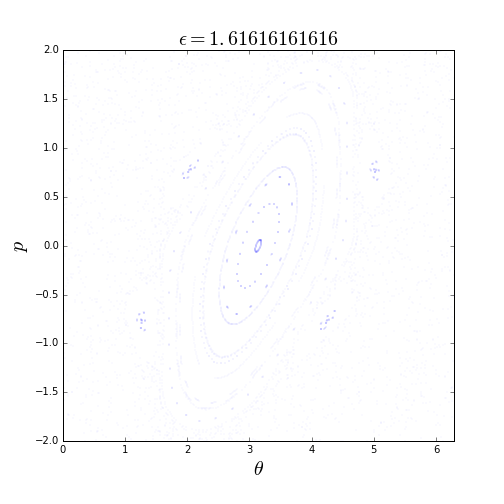
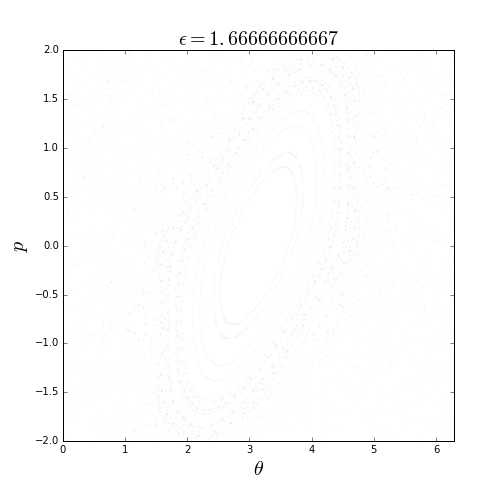
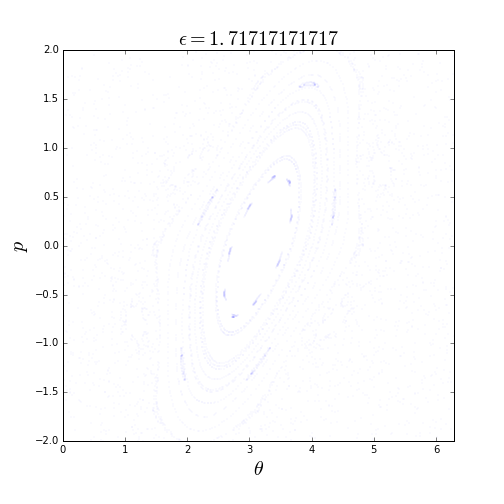
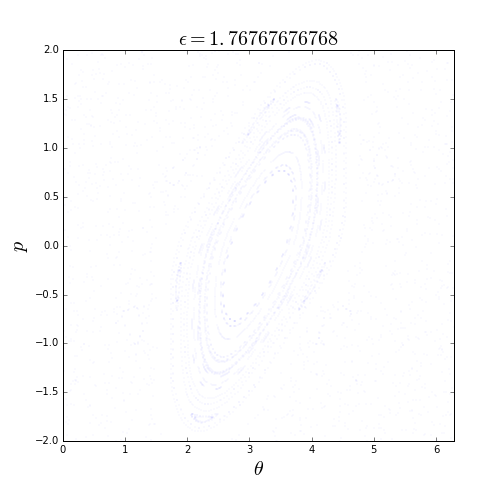
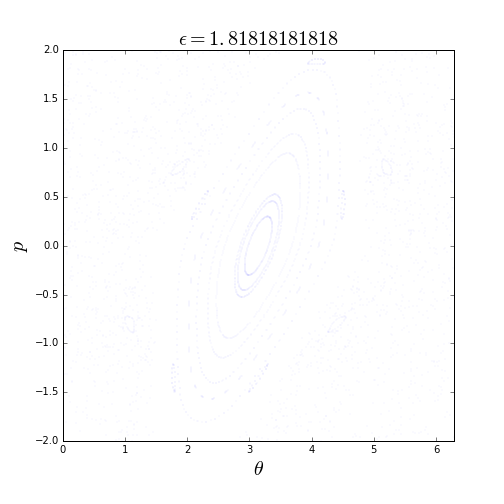
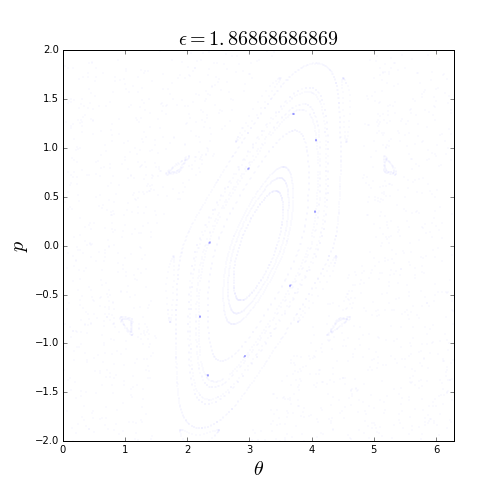
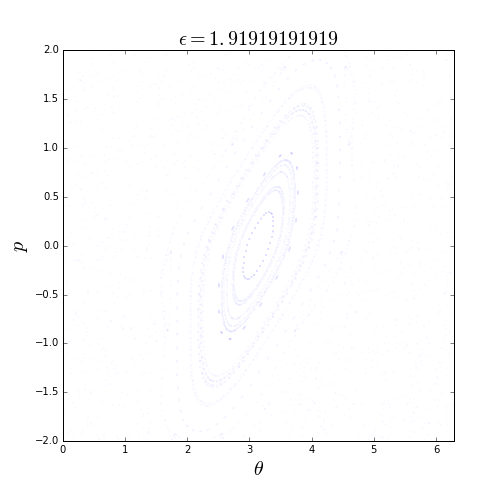
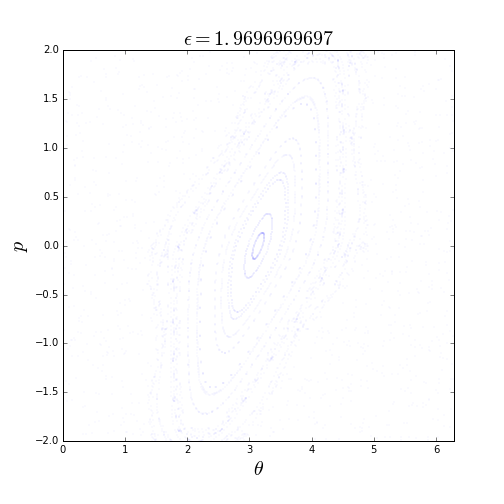
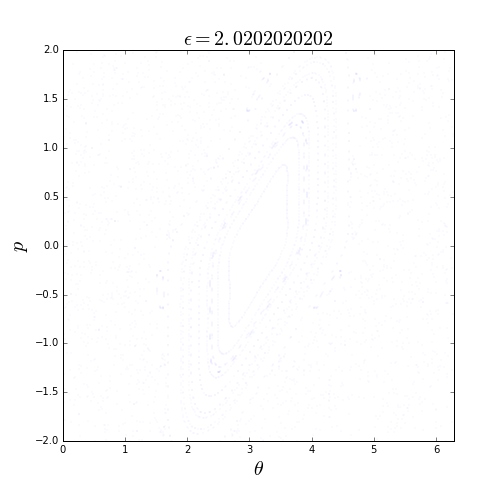
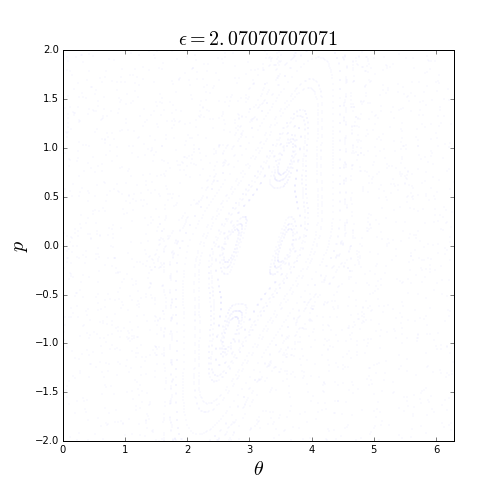
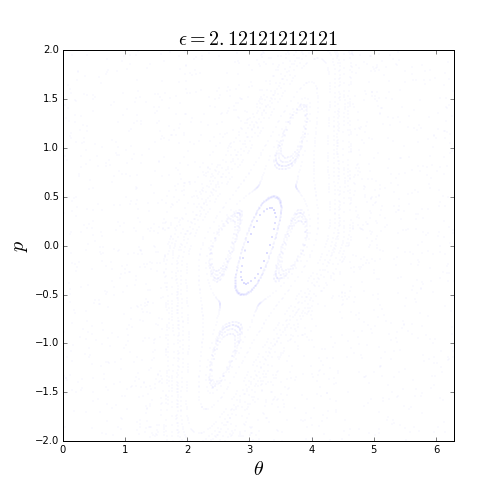
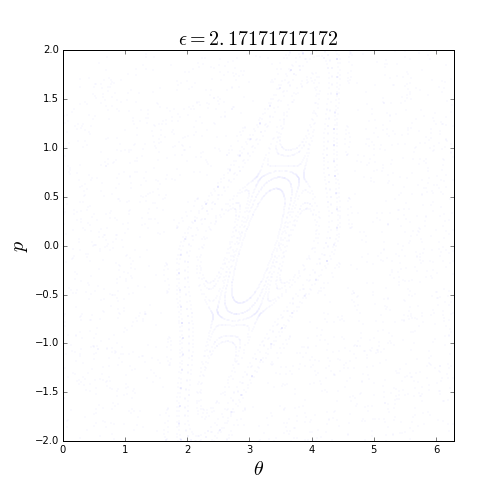
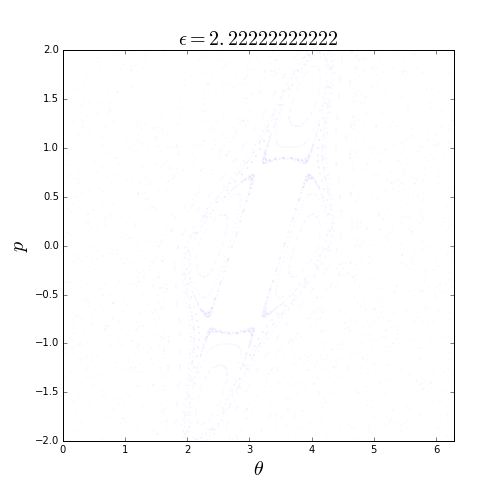
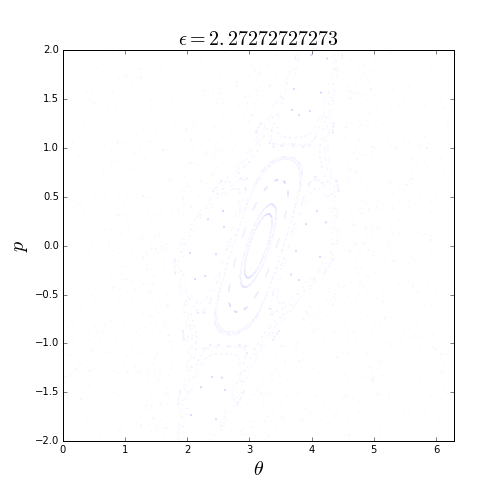
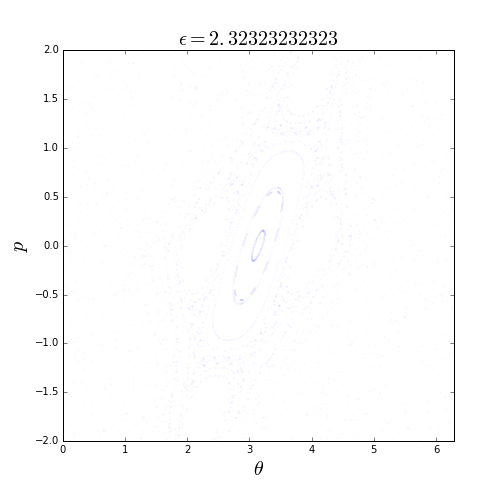
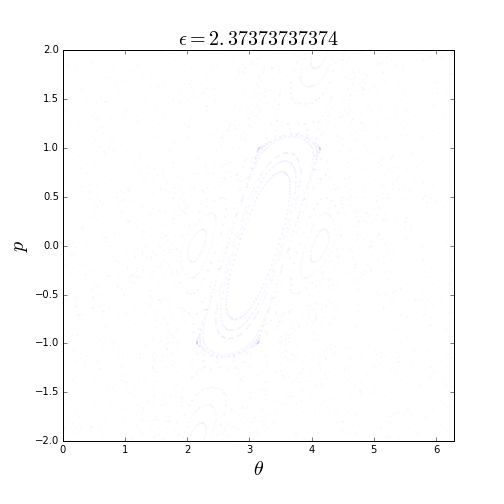
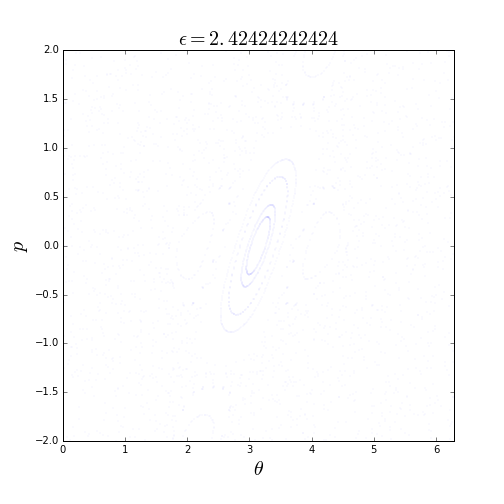
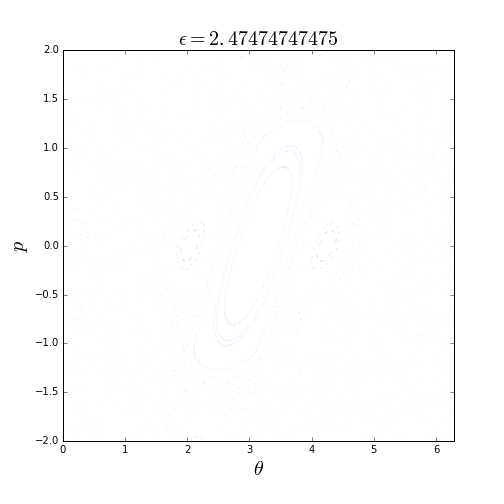
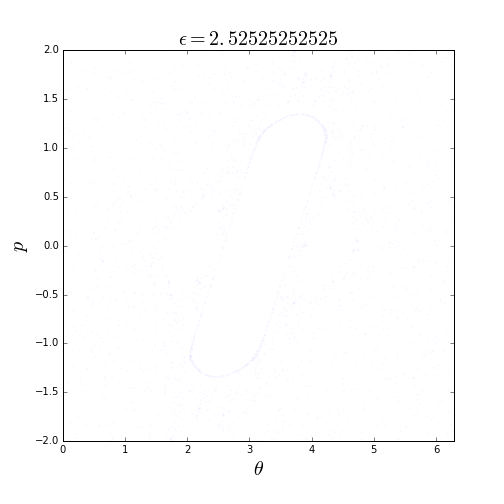
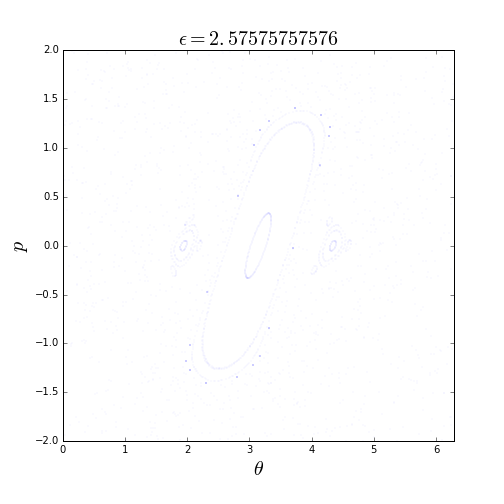
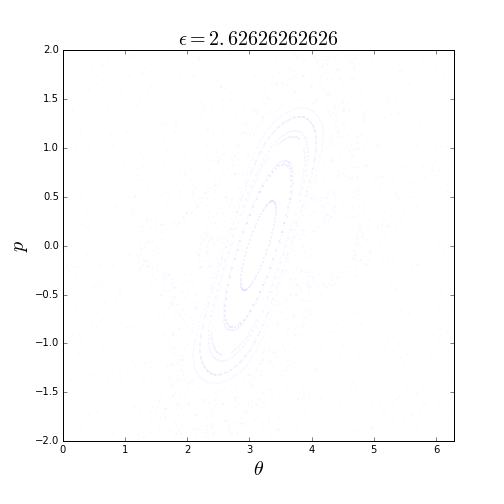
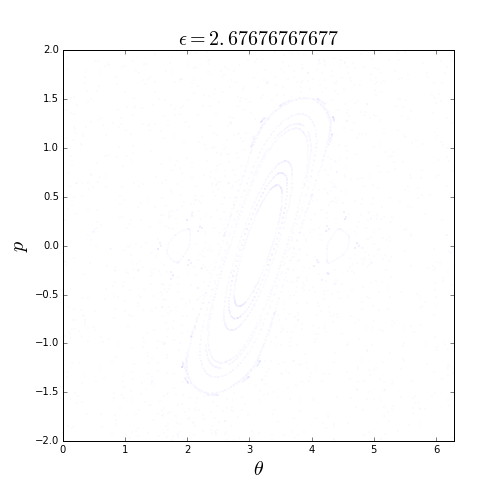
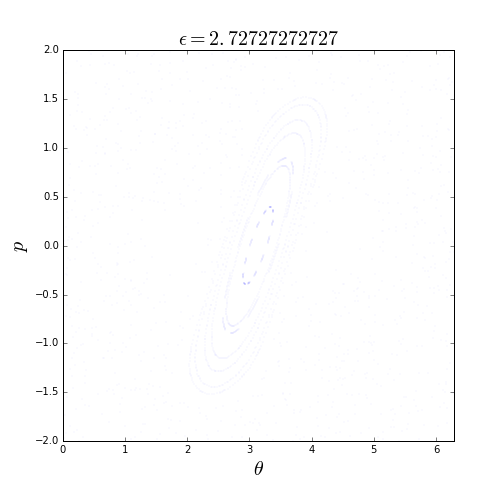
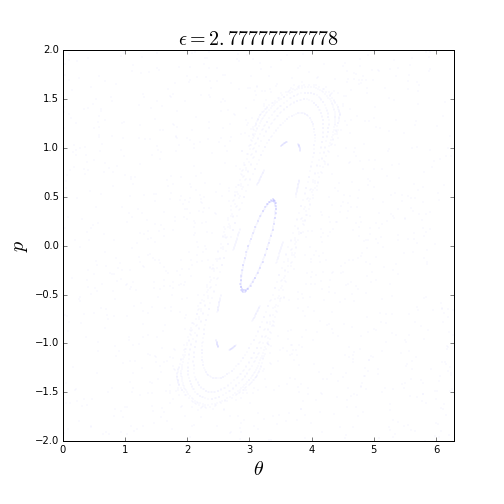
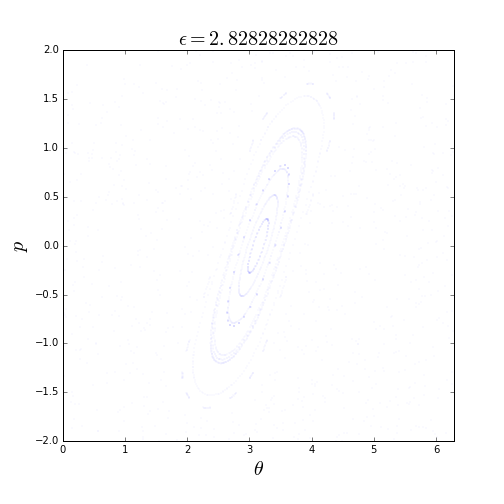
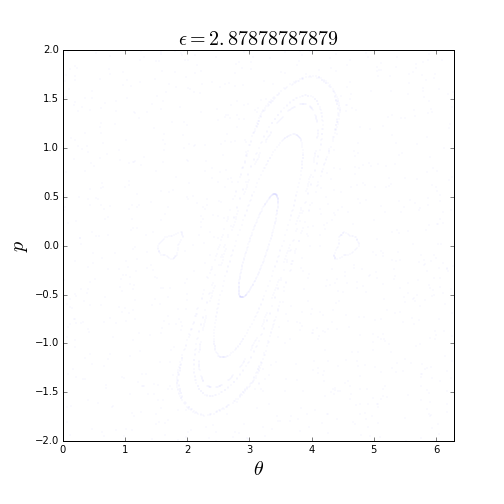
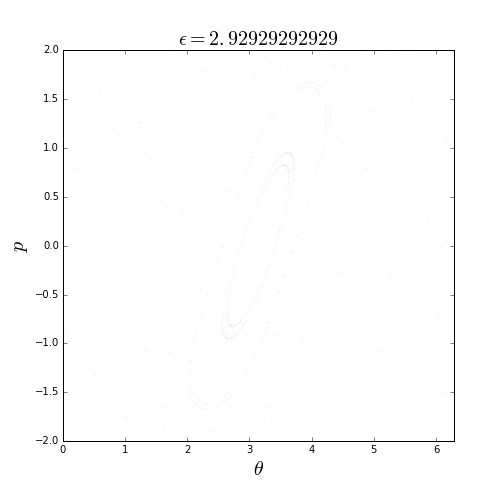
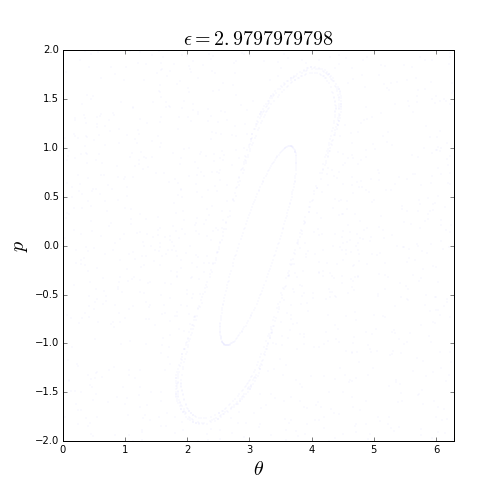
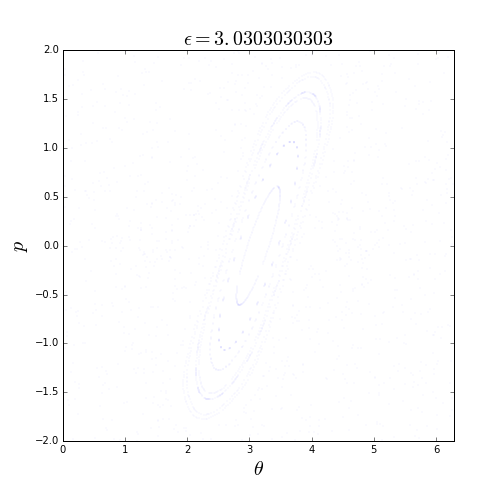
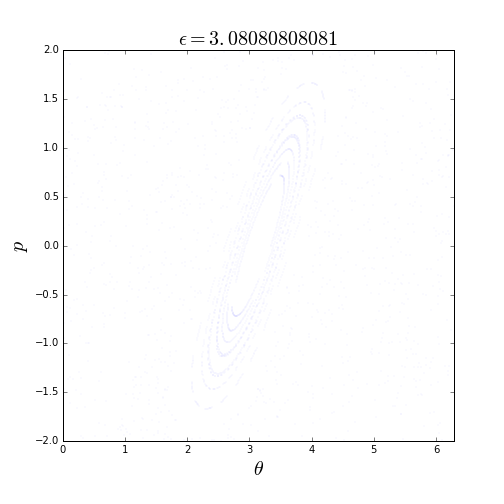
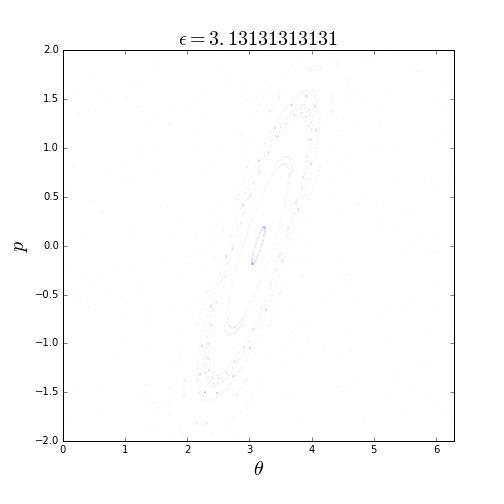
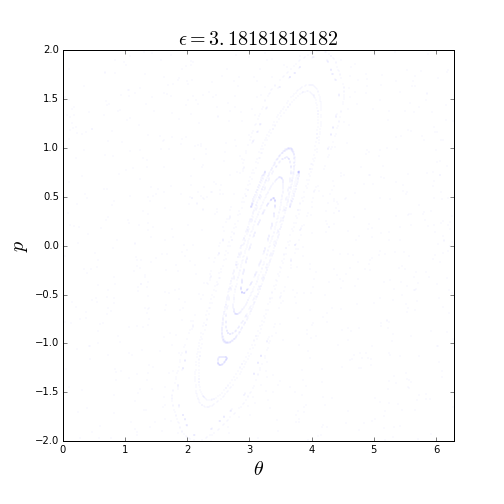
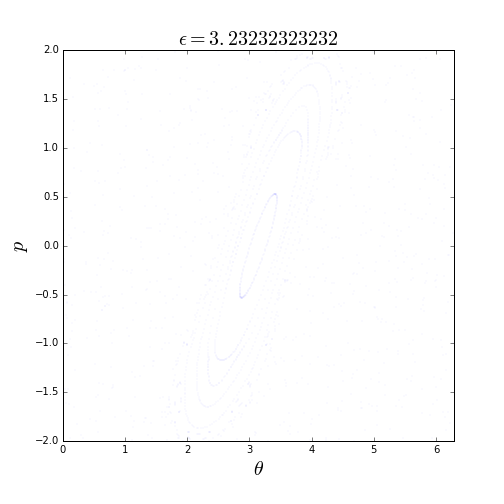
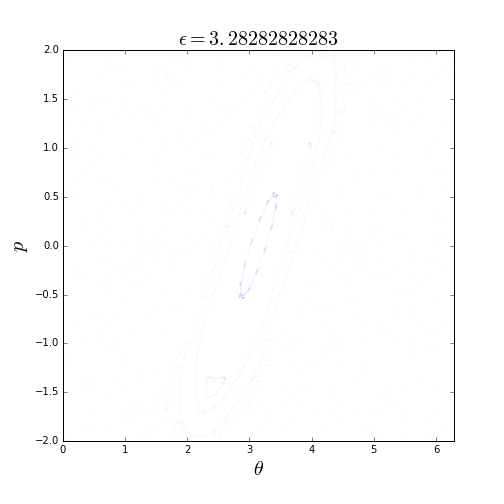
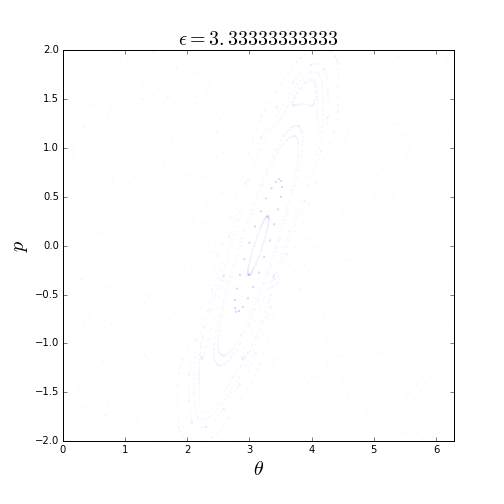
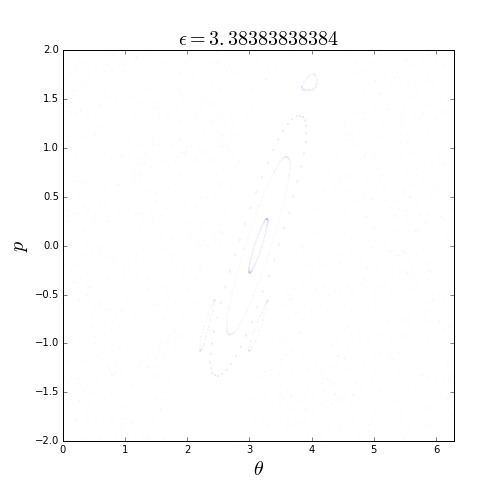
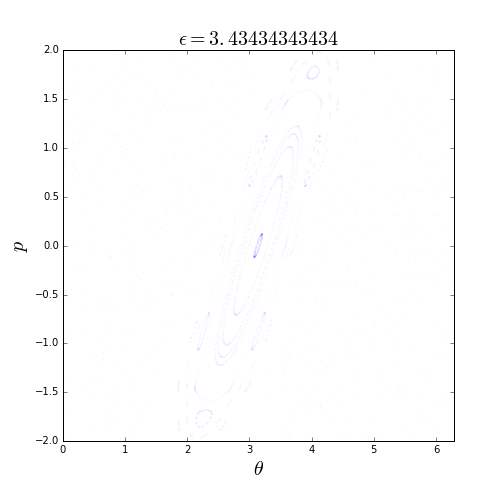
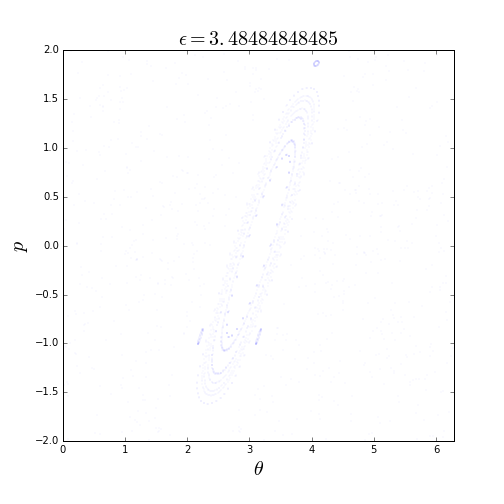
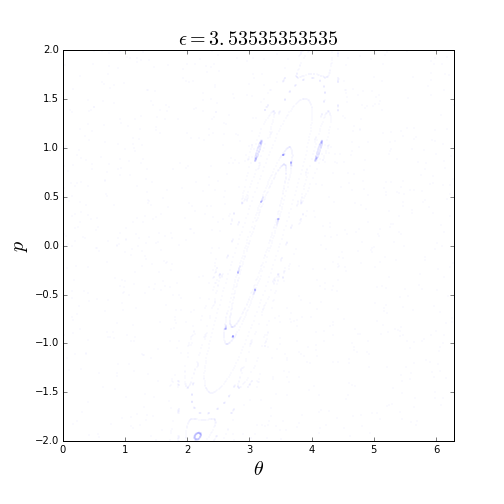
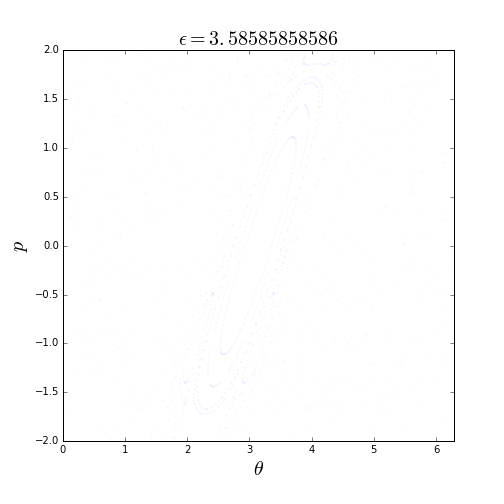
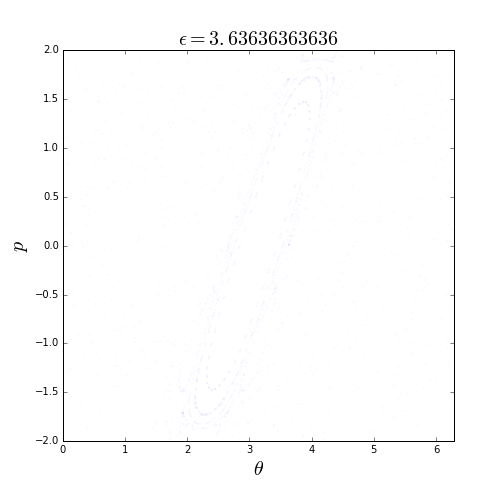
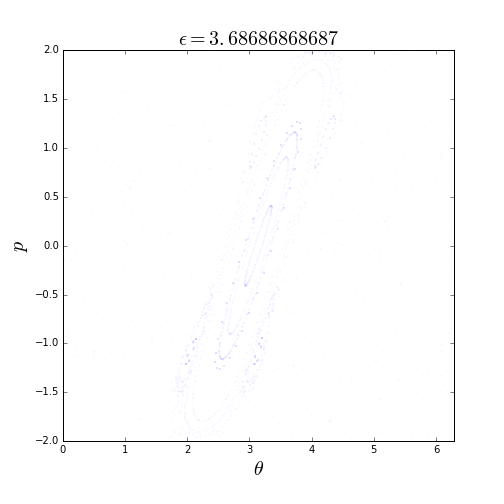
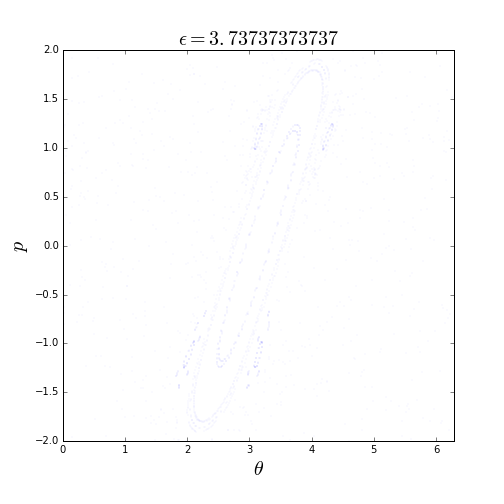
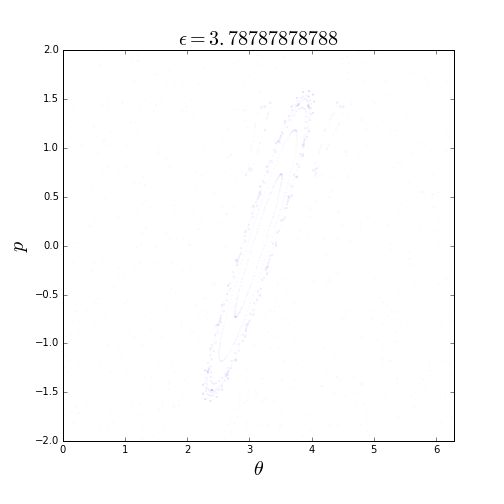
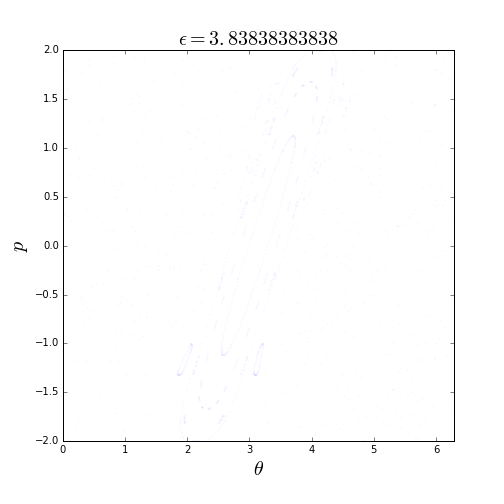
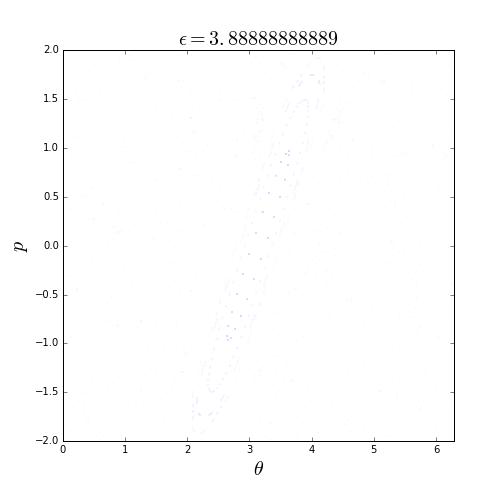
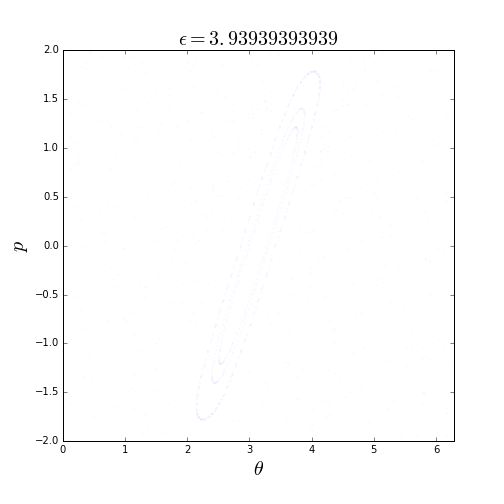
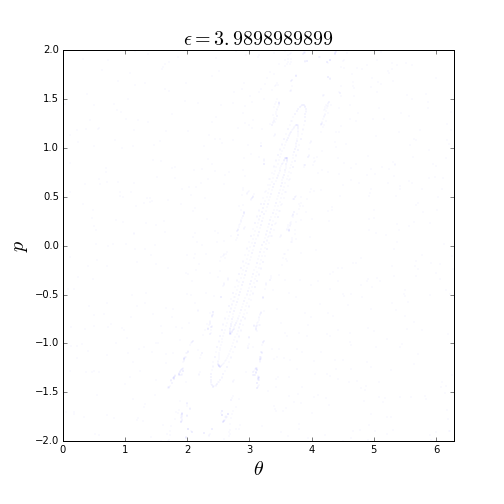
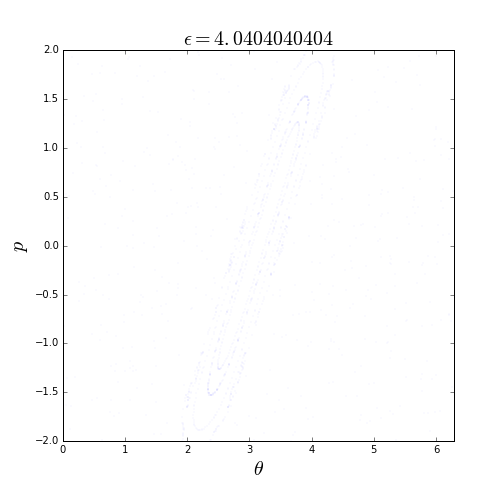
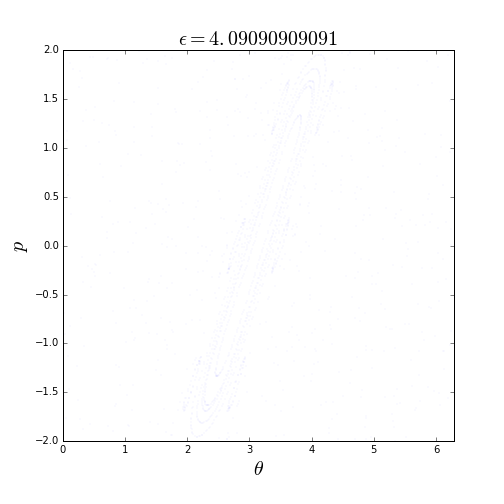
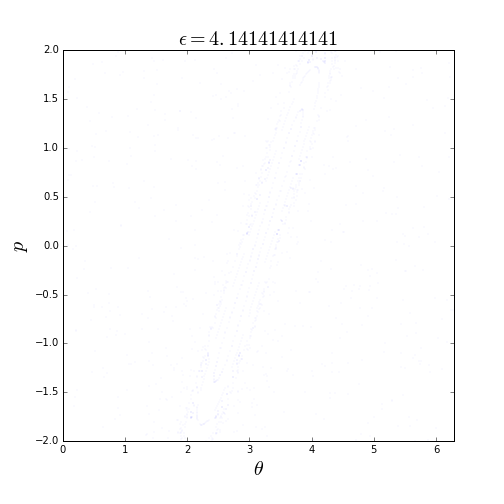
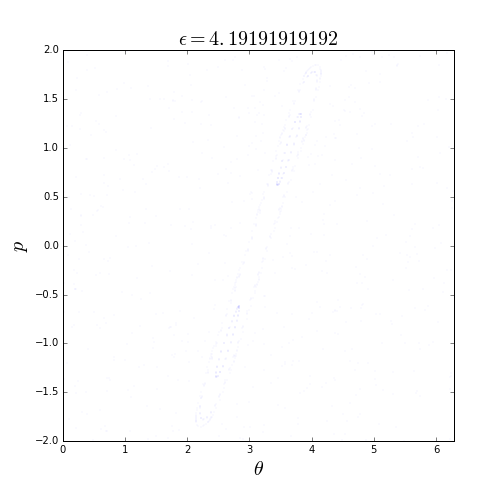
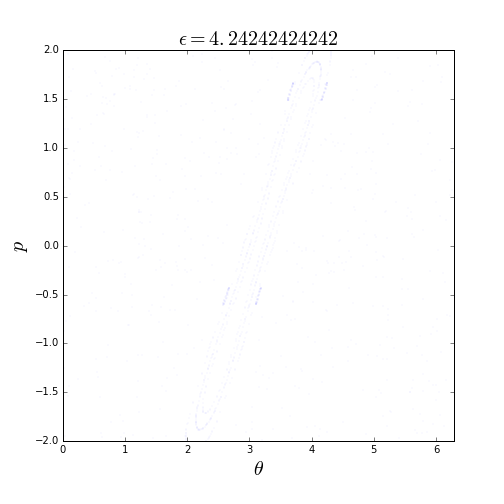
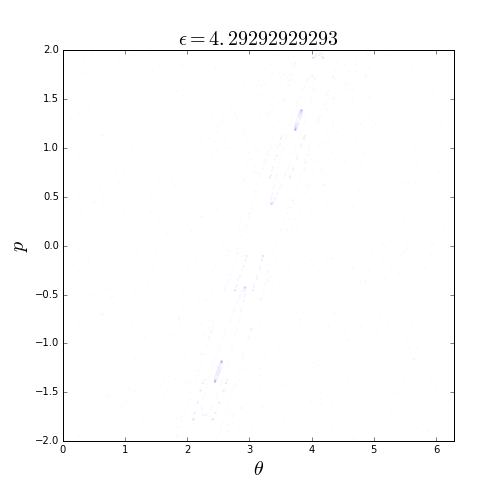
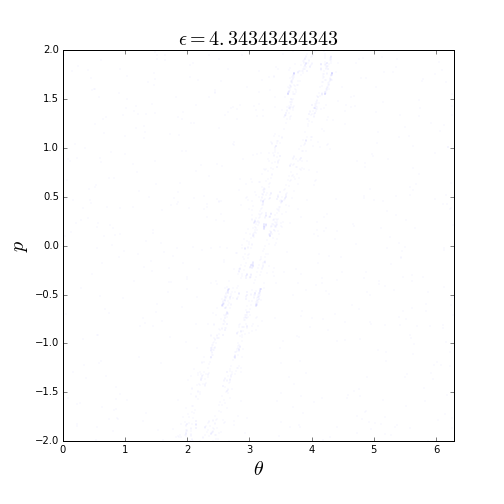
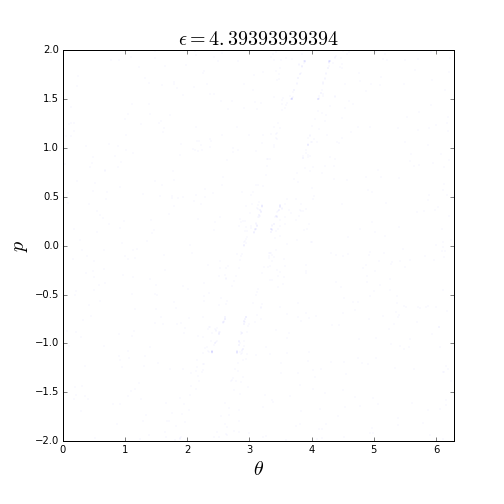
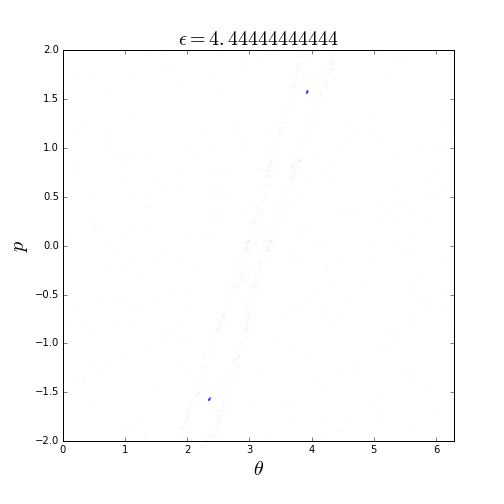
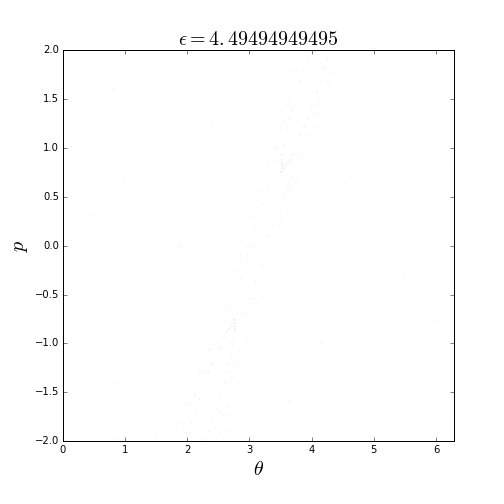
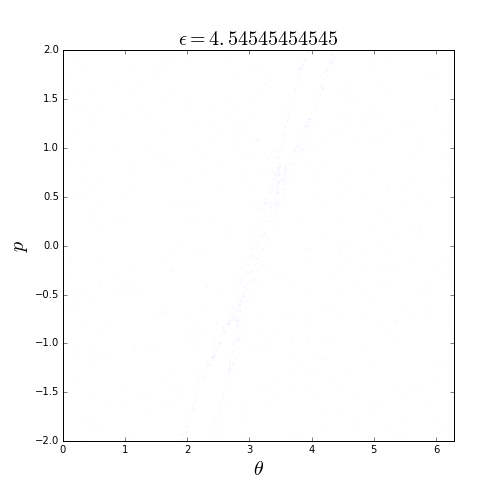
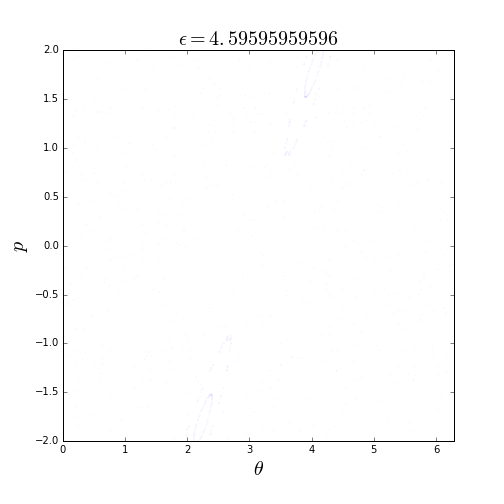
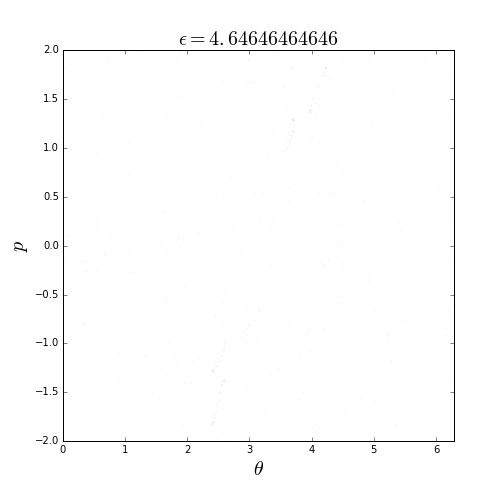
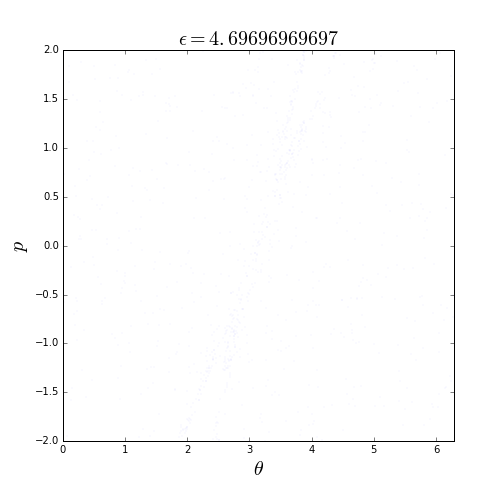
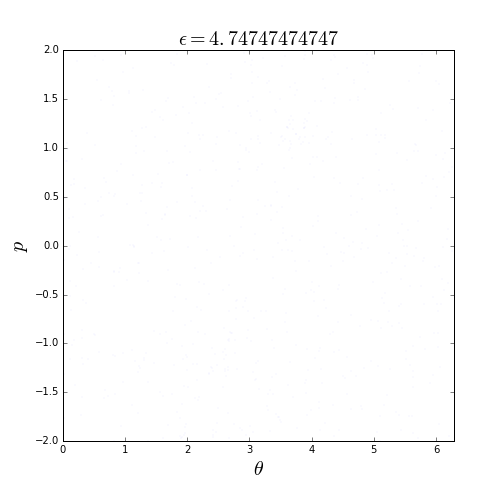
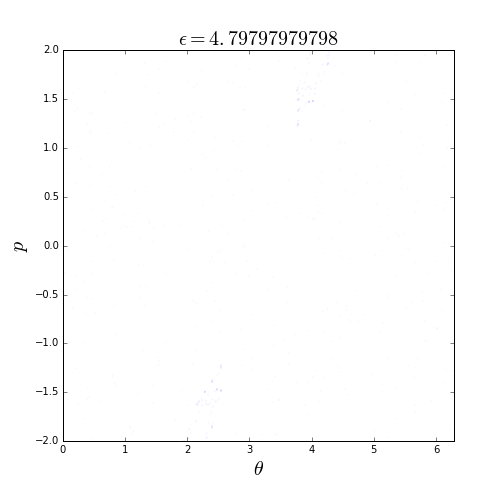
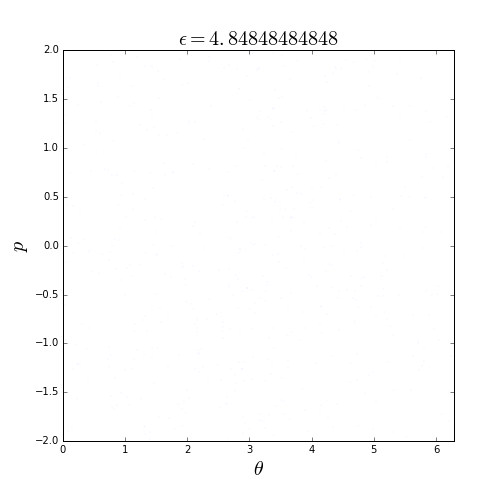
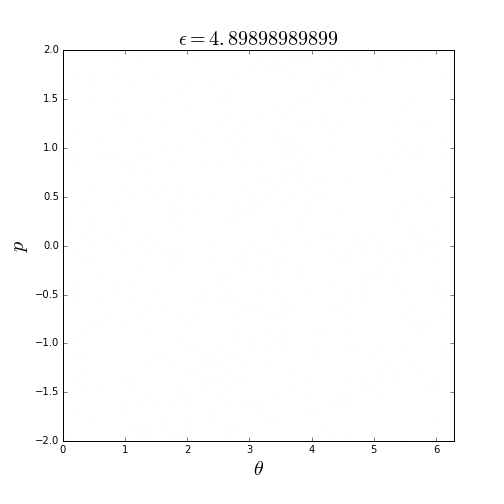
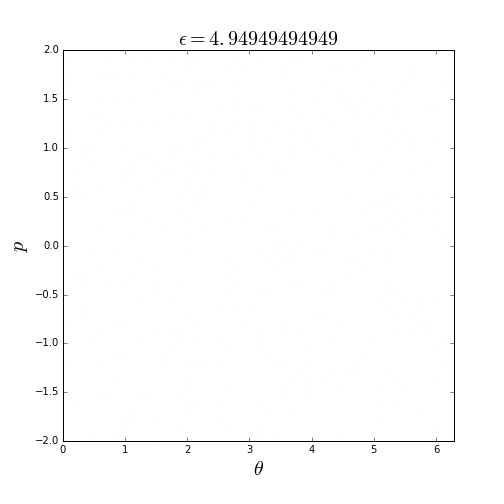
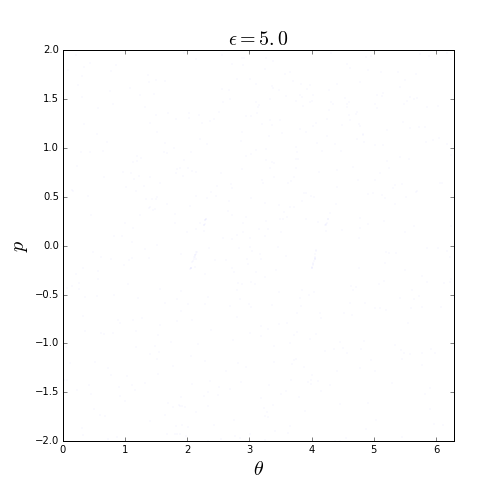

In [5]:
Neps = 100
eps = linspace(0.0,5.0, Neps)
n = 40
N = 200

fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel("$\\theta$", fontsize=20)
ax.set_ylabel("$p$", fontsize=20)
ax.set_xlim(0,2*pi)
ax.set_ylim(-2,2)
        
mapeoanim, = ax.plot([], [], '.', markersize=0.1)
def init():
    mapeoanim.set_data([], [])
    return mapeoanim,

def animate(i):
    x, y = zeros(n*N), zeros(n*N)
    for j in range(n):
        cond_ini = array([2.0*pi*random.rand(), pi*(random.rand()-0.5)])
        x[N*j:N*(j+1)], y[N*j:N*(j+1)] = sucesion(cond_ini, eps[i], N)
    mapeoanim.set_data(x, y)
    ax.set_title("$\epsilon = {}$".format(eps[i]), fontsize=20)
    return mapeoanim,

animation.FuncAnimation(fig, animate, init_func=init, frames=Neps)

# Ejercicio 2

In [5]:
def Energia(x):
    return 0.5*(x[0]**2+x[1]**2+x[2]**2+x[3]**2)+x[1]*x[0]**2-(x[1]**3)/3.

def ec_mov(x,t):
    return array([x[2], x[3], -x[0]-2*x[0]*x[1], -x[1]-x[0]**2+x[1]**2])

def root_trayect(func, ptoi, ti, error=1e-5):
    while abs(ptoi[0]) > error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(func, ptoi, [ti, tip1], atol = 1e-9, rtol= 1e-9)
        ptoi = paso[-1]
    return ptoi
    
def mapeo_poincare(func, E, t): 
    y, px = 0.1*random.rand(), random.uniform(-0.15,0.15)
    py2 = 2*(E+(1./3.)*y**3-0.5*y**2)-px**2    
    while py2 < 0.0:
        y, px = 0.1*random.rand(), random.uniform(-0.15,0.15)
        py2 = 2.0*(E+(1./3.)*y**3-0.5*y**2)-px**2
    py = sqrt(py2)
    p_ini = array([0.0, y, px, py])
    sol = odeint(func, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    num = len(t)
    raices, puntos = zeros(num), zeros((num,4))
    j = 0
    for i in range(num-1):
        if sol[i][0]*sol[i+1][0] < 0.0:
            puntos[j] = root_trayect(func, sol[i], t[i], error=1e-5)
            j += 1
    puntos = puntos[0:j]
    return puntos

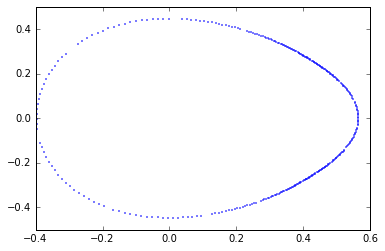

In [3]:
t = linspace(0,1000,10000)
E = 0.1
puntos = mapeo_poincare(ec_mov, E, t)

plot(puntos[:,1], puntos[:,3],'.',markersize=2)

0.01
0.03
0.1
0.12
0.15
0.166


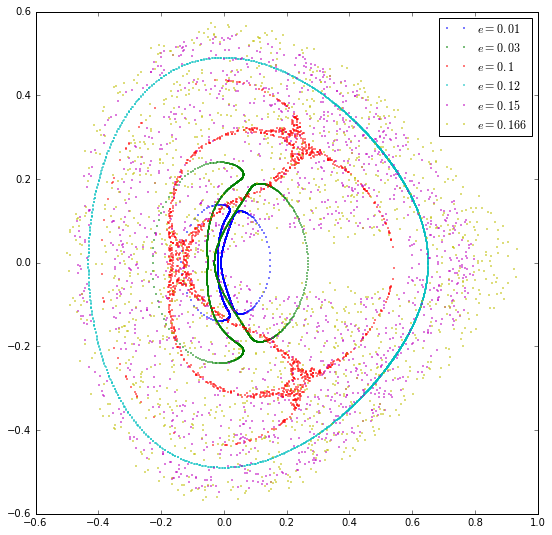

In [4]:
t = linspace(0, 5000, 15000)
E = array([0.01, 0.03, 0.1, 0.12, 0.15, 0.166])

figure(figsize=(9,9))
for e in E:
    print e
    puntos = mapeo_poincare(ec_mov, e, t)
    plot(puntos[:,1], puntos[:,3],'.', markersize=2, label="$e={}$".format(e))
legend()

In [6]:
t = linspace(0, 5000, 15000)
N = 50
n = 50
E = linspace(0.01, 0.166, N)

fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel("$y$", fontsize=20)
ax.set_ylabel("$p_y$", fontsize=20)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
        
mapeoanim, = ax.plot([], [], '.', markersize=1)
def init():
    mapeoanim.set_data([], [])
    return mapeoanim,

def animate(i):
    for ni in xrange(n):
        puntos = mapeo_poincare(ec_mov, E[i], t)
        mapeoanim.set_data(puntos[:,1], puntos[:,3])
    ax.set_title("$E = {}$".format(E[i]), fontsize=20)
    return mapeoanim,

animation.FuncAnimation(fig, animate, init_func=init, frames=N)

KeyboardInterrupt: 